## Medical Cost Prediction
>(Healthcare Domain)


## Business/Domain Understanding
### What is Insurance?
>Insurance is a contract between two parties whereby one party agrees to undertake the risk of the other in exchange for consideration known as premium and promises to indemnify the party on the happening of an uncertain event.
### What is health insurance?
>A plan that covers or shares the expenses associated with health care can be described as health insurance.

>Health insurance in India is an emerging insurance sector after the term life insurance and automobile insurance sector. Rise in the middle class, higher hospitalization cost, expensive health care, digitization and increase in awareness level are some important drivers for the growth of the health insurance market in India.



### Task
>How to split the given data into Train and Test?

>How to perform Data Preparation on -

>Categorical Columns - OneHotEncoding and LabelEncoding

>Numerical Columns - Standardization and Normalization

>How to build ML models that can predict medical costs billed by health insurance on an individual given some features about the individual in the dataset.


## Import the required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Step - 1: Load the data and perform the basic EDA to understand the data.
### Load the Data

In [2]:
Health_insurance=pd.read_csv(r'C:\Users\Irfan\Downloads\insurance.csv')
Health_insurance.drop(Health_insurance.filter(regex="Unnamed"),axis=1, inplace=True)

In [3]:
Health_insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Exploratory Data Analysis
1.Univariate Analysis 

2.Bivariate Analysis 

3.Missing Values 

4.Outliers 

### Columns or Dimensions or Features or Properties
>age: age of primary beneficiary

>sex: insurance contractor gender, female, male

>bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective 
index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

>children: Number of dependents

>smoker: Smoking

>region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

>charges: Individual medical costs billed by health insurance


In [4]:
Health_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
Health_insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [6]:
Health_insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Machine Learning Problem
>Build a system which can take features of Medical case(Health insurence) like age, sex, bmi, children, smoker, region and predicts the charges of Medical case(Health insurence).


>Target Variable:charges

## Numarical variables

In [7]:
num=Health_insurance.select_dtypes(include='number')
num

,age,bmi,children,charges
0,19,27.900,0,16884.92400
1,18,33.770,1,1725.55230
2,28,33.000,3,4449.46200
3,33,22.705,0,21984.47061
4,32,28.880,0,3866.85520
...,...,...,...,...
1333,50,30.970,3,10600.54830
1334,18,31.920,0,2205.98080
1335,18,36.850,0,1629.83350
1336,21,25.800,0,2007.94500


## Univariate analysis

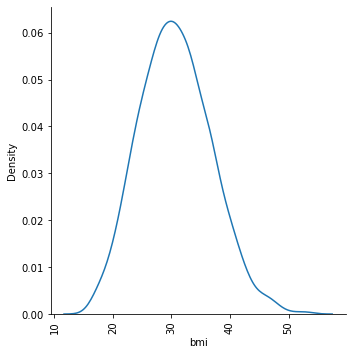

In [8]:
sns.displot(x=Health_insurance['bmi'],data=Health_insurance,kind='kde')
plt.xticks(rotation=90)   
plt.show()

## Observation:
>The density of body mass index is high weights at 20-40 that are relative to height

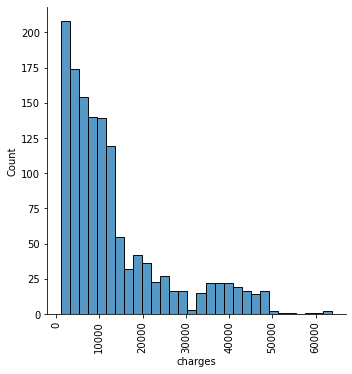

In [9]:
sns.displot(x=Health_insurance['charges'],data=Health_insurance,kind='hist')
plt.xticks(rotation=90)   
plt.show()

## Observation:
>The max charges of count below 10000

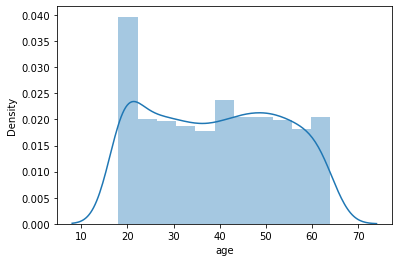

In [10]:
sns.distplot(Health_insurance['age'])
plt.show()

## Observation
>age of primary beneficiary is high dendity in the range 20-30.

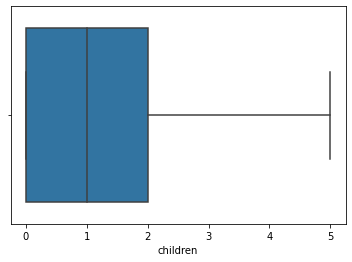

In [11]:
sns.boxplot(Health_insurance['children'])
plt.show()

## Observation:
>Here we observe that there is no outliers in boxplot and first quartile is 0 and third quartile is 2 and the upper bound is 5

## Categorical columns

In [12]:
cat=Health_insurance.select_dtypes(exclude='number')
cat

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


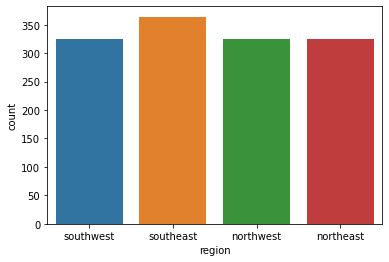

In [13]:
sns.countplot(Health_insurance['region']);

## Observation:
>The count is max in southeast region.

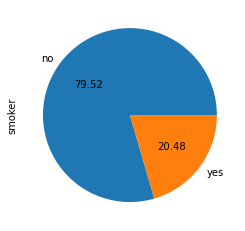

In [14]:
Health_insurance['smoker'].value_counts().plot(kind="pie",autopct="%.2f");

## Observation:
>smoker percentage is less compare to non smoker percentage

## BIVARIATE ANALYSIS

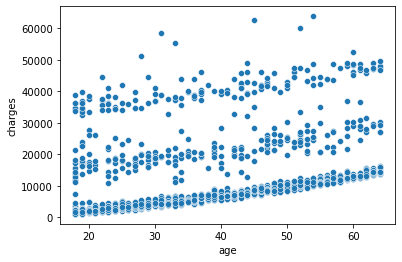

In [15]:
sns.scatterplot(x=Health_insurance['age'],y=Health_insurance['charges'],data=Health_insurance)
plt.show()

## Observation:
>Here if the age is increase the charges also increase.

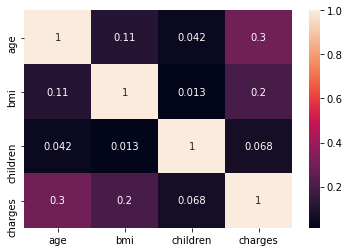

In [16]:
sns.heatmap(Health_insurance.corr(),annot=True)
plt.show()

## Observation:
>here age and charges are mostly have positive correlation.means if the age is increase the charges are also increased.

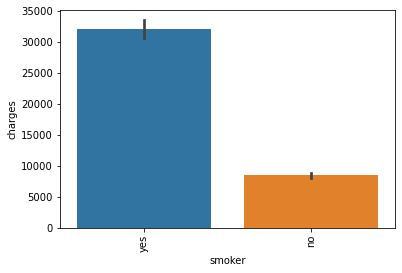

In [17]:
sns.barplot(x=Health_insurance['smoker'],y=Health_insurance['charges'],data=Health_insurance)
plt.xticks(rotation=90)
plt.show()

## Observation:
>Here we can say that the smoker have most charges.

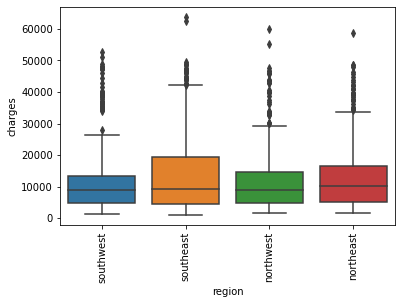

In [18]:
sns.boxplot(x=Health_insurance['region'],y=Health_insurance['charges'],data=Health_insurance)
plt.xticks(rotation=90)
plt.show()

## Observation:
>Here we can say that southeast region peoples billed more than 40000

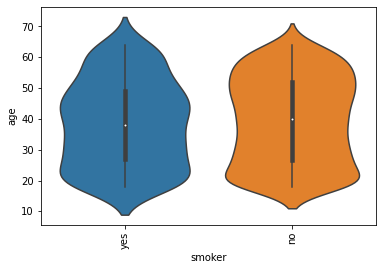

In [19]:
sns.violinplot(x=Health_insurance['smoker'],y=Health_insurance['age'],data=Health_insurance)
plt.xticks(rotation=90)
plt.show()

## Observation:
>The smoker age high density in the range between 20-50.

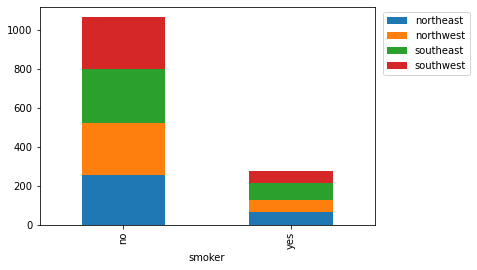

In [20]:
crosstab=pd.crosstab(Health_insurance['smoker'],Health_insurance['region'])
crosstab.plot(kind='bar',stacked=True)
plt.legend(bbox_to_anchor=(1.3,1))
plt.show()

## Observation:
>Here the smoker are less compare to non smokers region wise.

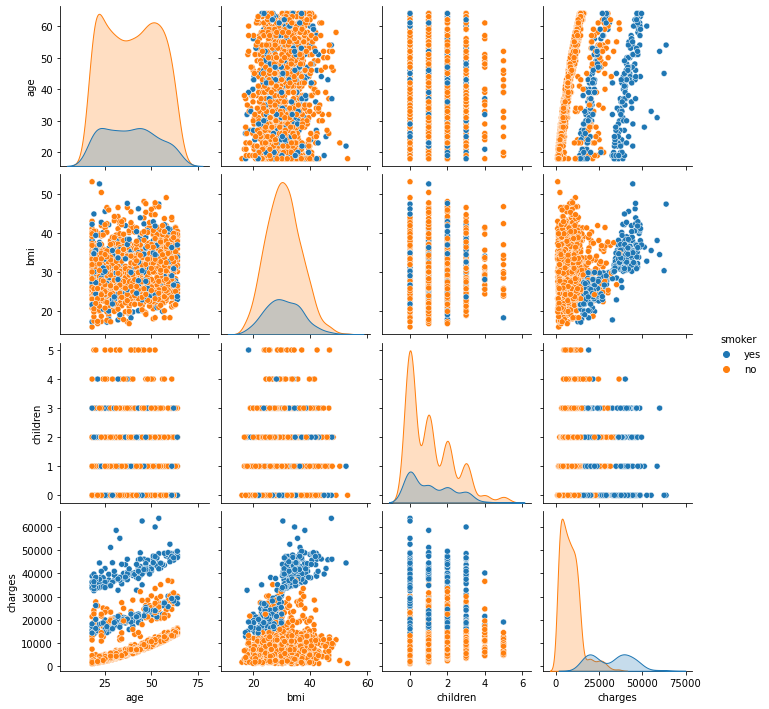

In [21]:
sns.pairplot(data=Health_insurance,hue='smoker')
plt.show()

## Step - 2: Document the below mentioned points properly: 
- Input variables:age,sex,bmi,children,smoker,region
- Target variable:charges
- Type:Supervised Learning(since target variable is given).
- Task:Regression(The target variable is continous or realvalued).
- Identify the Evaluation Metric.
	- regression task - Mean Absolute Error

In [22]:
X=Health_insurance[['age','sex','bmi','children','smoker','region']]
y=Health_insurance['charges']

In [23]:
Health_insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Step - 3: Split the dataset into Training and Testing (recommended 75:25 split).

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1003, 6) (1003,)
(335, 6) (335,)


### Step - 4: Data preparation on train data:
- For Numerical Variables - Standardization or Normalization (Fit and Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [49]:
X_train_cat=X_train.select_dtypes(include='object')
X_train_num=X_train.select_dtypes(include=['float64','int64'])
print(X_train_cat.shape,X_train_num.shape)
X_test_cat=X_test.select_dtypes(include='object')
X_test_num=X_test.select_dtypes(include=['float64','int64'])
print(X_test_cat.shape,X_test_num.shape)

(1003, 3) (1003, 3)
(335, 3) (335, 3)


In [50]:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,age,bmi,children
1075,-0.514853,-0.181331,-0.063607
131,1.548746,-1.393130,-0.892144
15,-1.439915,-0.982242,-0.063607
1223,-1.368757,-1.011133,-0.892144
1137,-0.941805,-1.362635,-0.892144


In [51]:
# OneHotEncoding the categorical features

from sklearn.preprocessing import OneHotEncoder

encoder_ = OneHotEncoder(drop='first', sparse=False)

# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_train_cat), 
                               columns=encoder_.get_feature_names(X_train_cat.columns), 
                               index = X_train_cat.index)

X_train_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1075,0.0,0.0,0.0,1.0,0.0
131,0.0,0.0,0.0,0.0,0.0
15,1.0,0.0,0.0,0.0,1.0
1223,0.0,1.0,0.0,1.0,0.0
1137,0.0,0.0,1.0,0.0,0.0


## Cancat traindata

In [52]:
X_train_transformed = pd.concat([X_train_num_rescaled, X_train_cat_ohe], axis=1)

X_train_transformed.head()


,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
1075,-0.514853,-0.181331,-0.063607,0.0,0.0,0.0,1.0,0.0
131,1.548746,-1.393130,-0.892144,0.0,0.0,0.0,0.0,0.0
15,-1.439915,-0.982242,-0.063607,1.0,0.0,0.0,0.0,1.0
1223,-1.368757,-1.011133,-0.892144,0.0,1.0,0.0,1.0,0.0
1137,-0.941805,-1.362635,-0.892144,0.0,0.0,1.0,0.0,0.0


### Step - 5: Data preparation on test data:
-   For Numerical Variables - Standardization (Transform)
- For Categorical - LabelEncoding or OneHotEncoding (Choose wisely)


In [53]:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                   columns = X_test_num.columns, 
                                   index = X_test_num.index)

X_test_num_rescaled.head()

,age,bmi,children
578,0.908319,-0.083424,-0.063607
610,0.552526,-0.216642,-0.063607
569,0.623684,1.580192,0.764931
1034,1.548746,1.229492,-0.892144
198,0.837160,-2.033538,-0.892144


In [54]:
X_test_cat_ohe = pd.DataFrame(encoder_.fit_transform(X_test_cat), 
                               columns=encoder_.get_feature_names(X_test_cat.columns), 
                               index = X_test_cat.index)

X_test_cat_ohe.head()

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
578,1.0,0.0,0.0,0.0,1.0
610,0.0,0.0,0.0,1.0,0.0
569,1.0,1.0,1.0,0.0,0.0
1034,1.0,0.0,1.0,0.0,0.0
198,0.0,0.0,1.0,0.0,0.0


## Cancat testdata

In [55]:
X_test_transformed = pd.concat([X_test_num_rescaled, X_test_cat_ohe], axis=1)

X_test_transformed.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
578,0.908319,-0.083424,-0.063607,1.0,0.0,0.0,0.0,1.0
610,0.552526,-0.216642,-0.063607,0.0,0.0,0.0,1.0,0.0
569,0.623684,1.580192,0.764931,1.0,1.0,1.0,0.0,0.0
1034,1.548746,1.229492,-0.892144,1.0,0.0,1.0,0.0,0.0
198,0.837160,-2.033538,-0.892144,0.0,0.0,1.0,0.0,0.0


### Step - 6: Model Training Phase - Use all the algorithms mentioned below to train separate models:
- Linear Regression
- KNN
- Support Vector Machines
- Decision Trees
- Random Forest
### Step - 7: Predict and evaluate each model separately using the correct evaluation metric. 
### Step - 8: Display a plot which shows all the algorithms applied along with the scores achieved. 
>Write your conclusion on the best algorithm for the Medical Cost Prediction problem.



### Linear Regression

#### Training

In [56]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_transformed, y_train)

LinearRegression()

#### Prediction

In [57]:
y_test_pred = regressor.predict(X_test_transformed)

#### Evaluation

In [58]:
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

4012.715276853087

<AxesSubplot:xlabel='charges', ylabel='Count'>

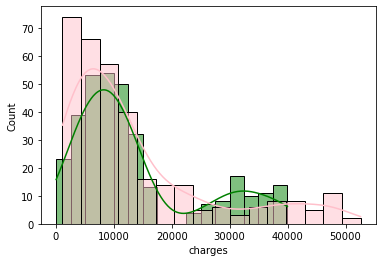

In [59]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

### Training-KNN Regression

In [60]:
from sklearn.neighbors import KNeighborsRegressor
KNN_regression=KNeighborsRegressor()
KNN_regression.fit(X_train_transformed,y_train)
y_test_pred=KNN_regression.predict(X_test_transformed)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

4146.4536904686565

<AxesSubplot:xlabel='charges', ylabel='Count'>

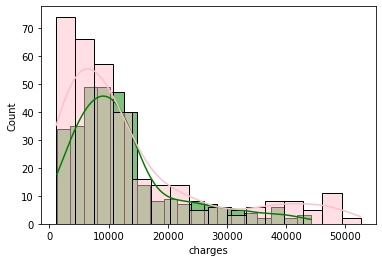

In [61]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

### Training-Support vector Regression

In [62]:
from sklearn.svm import SVR
SV_regression=SVR()
SV_regression.fit(X_train_transformed,y_train)
y_test_pred=SV_regression.predict(X_test_transformed)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

8545.93890360446

<AxesSubplot:xlabel='charges', ylabel='Count'>

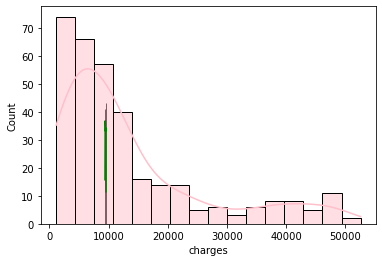

In [63]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

### Training-Decision Tree Regression

In [64]:
from sklearn.tree import DecisionTreeRegressor
DT_regression=DecisionTreeRegressor()
DT_regression.fit(X_train_transformed,y_train)
y_test_pred=DT_regression.predict(X_test_transformed)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

3202.3092136686564

<AxesSubplot:xlabel='charges', ylabel='Count'>

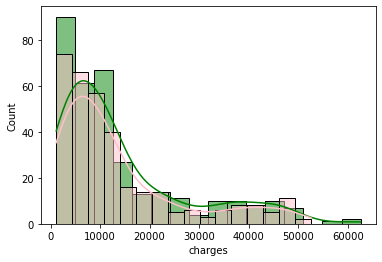

In [65]:
sns.histplot(y_test_pred,color='green',kde=True)
sns.histplot(y_test,color='pink',kde=True)

## Ensemble

### Training-Random Forest Regression

In [66]:
from sklearn.ensemble import RandomForestRegressor
Random_regression=RandomForestRegressor()
Random_regression.fit(X_train_transformed,y_train)
y_test_pred=Random_regression.predict(X_test_transformed)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

2681.0567487174126

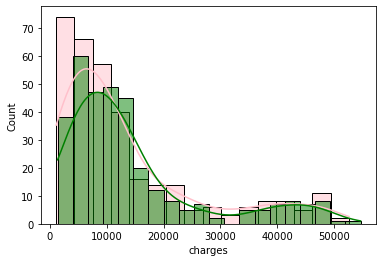

In [67]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);

## Training-Adaboost Regression

In [68]:
from sklearn.ensemble import AdaBoostRegressor
ADA_regression=AdaBoostRegressor()
ADA_regression.fit(X_train_transformed,y_train)
y_test_pred=ADA_regression.predict(X_test_transformed)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

4512.791063298419

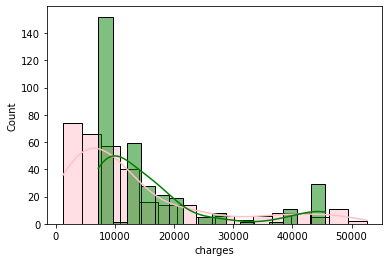

In [69]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);

## Training-Gradiant boost decision tree Regression

In [70]:
from sklearn.ensemble import GradientBoostingRegressor
GBDT_regression=GradientBoostingRegressor()
GBDT_regression.fit(X_train_transformed,y_train)
y_test_pred=GBDT_regression.predict(X_test_transformed)
from sklearn import metrics
metrics.mean_absolute_error(y_test,y_test_pred)

2431.6330905432064

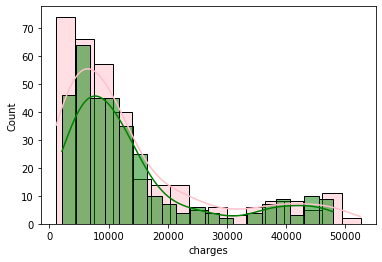

In [71]:
sns.histplot(y_test, color='pink',kde=True)
sns.histplot(y_test_pred, color='green',kde=True);

### Conclusion:
- Gradiant boost decision tree Regression algorithm is the best model for Medical Cost Prediction 
- Becuase Gradiant boost decision tree Regression mean absolute error is less compare to the other models .